# PR and ROC Curves, ROC-AUC, PR-AUC

## Import Libraries

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import (precision_recall_curve, confusion_matrix, roc_curve, 
roc_auc_score, average_precision_score)
import matplotlib.pyplot as plt


## Load the data and split it

In [2]:
mnist = fetch_openml("mnist_784", version=1, as_frame = False)

C:\Users\ayush\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X = mnist['data']
y = mnist['target']

In [4]:
y = y.astype('int')

In [5]:
y_5 = (y==5)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_5, test_size=0.2, random_state=43)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((56000, 784), (56000,), (14000, 784), (14000,))

## Load and fit the model

In [7]:
sgd_classifier = SGDClassifier()

sgd_classifier.fit(X_train, y_train)

SGDClassifier()

## Get decision scores

In [8]:
y_scores = sgd_classifier.decision_function(X_train)

y_scores

array([ -7770.85771554,  -8681.1946696 , -11777.97524411, ...,
        -6183.68525358,  -4337.63295212,  -8757.91365381])

## Precision-Recall Curve

In [9]:
precision, recall, pr_thresholds = precision_recall_curve(y_train, y_scores)

In [10]:
precision[:3], recall[:3], pr_thresholds[:3]

(array([0.08957143, 0.08957303, 0.08957463]),
 array([1., 1., 1.]),
 array([-61141.01976967, -60883.47772757, -59751.84411303]))

## Inspect threshold behavior manually

In [11]:
def inspect_threshold(threshold):
    y_pred = (y_scores>=threshold)
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()

    precision = tp/(tp+fp) if (tp+fp) else 0
    recall = tp/(tp+fn)

    print(f"Threshold :{threshold:.2f}")
    print(f"TP={tp}, FP={fp}, FN={fn}, TN={tn}")
    print(f"Precison = {precision:.3f}, Recall = {recall:.3f}")
    

In [12]:
inspect_threshold(0)

Threshold :0.00
TP=3585, FP=276, FN=1431, TN=50708
Precison = 0.929, Recall = 0.715


In [13]:
inspect_threshold(2000)

Threshold :2000.00
TP=2257, FP=59, FN=2759, TN=50925
Precison = 0.975, Recall = 0.450


In [14]:
inspect_threshold(-2000)

Threshold :-2000.00
TP=4472, FP=1548, FN=544, TN=49436
Precison = 0.743, Recall = 0.892


## ROC Curve

In [15]:
fpr, tpr, roc_threshold = roc_curve(y_train, y_scores)

fpr, tpr, roc_threshold

(array([0.        , 0.        , 0.        , ..., 0.98707438, 0.98707438,
        1.        ]),
 array([0.00000000e+00, 1.99362041e-04, 7.57575758e-03, ...,
        9.99800638e-01, 1.00000000e+00, 1.00000000e+00]),
 array([ 15878.94493834,  15877.94493834,   9622.68747477, ...,
        -26153.68036901, -26172.65574872, -61141.01976967]))

## Plot PR vs Threshold Curve

In [16]:
def plot_pr_vs_threshold(precision, recall, threshold):
    plt.figure(figsize=(10,5))
    plt.plot(threshold, precision[:-1], "b--", label="Precision")
    plt.plot(threshold, recall[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc = 'upper left')
    plt.ylim([0,1])

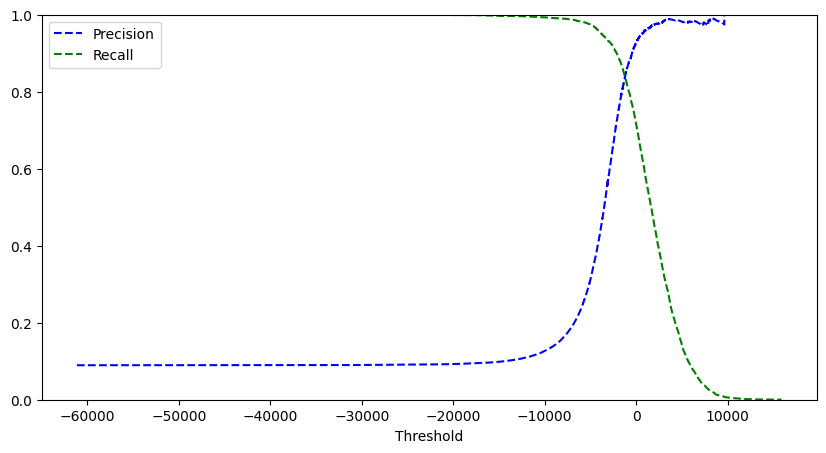

In [17]:
plot_pr_vs_threshold(precision, recall,pr_thresholds)

## Plot PR curve

In [18]:
def pr_curve(precision, recall):
    plt.figure(figsize=(10, 5))
    plt.plot(recall, precision,  "b-")
    plt.ylim([0,1])
    plt.xlim([0,1])
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision vs Recall");

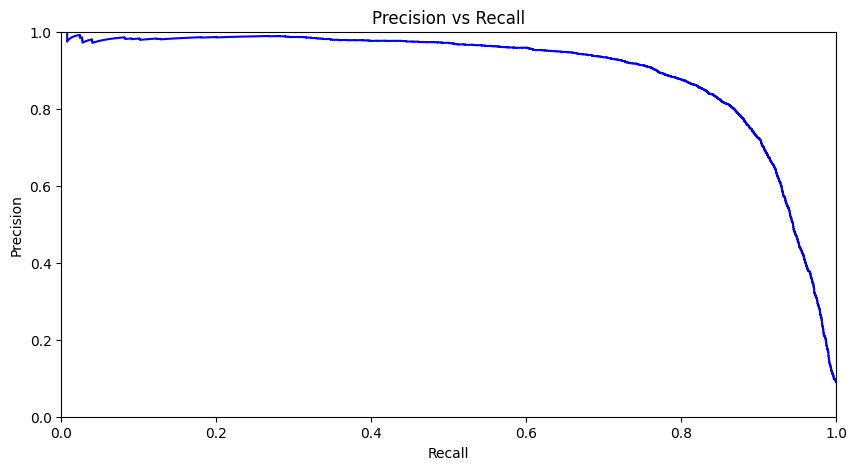

In [19]:
pr_curve(precision, recall)

## Plot ROC Curve

In [20]:
def roc_plot(fpr, tpr, label = None):
    plt.figure(figsize = [10,7])
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], "r--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")

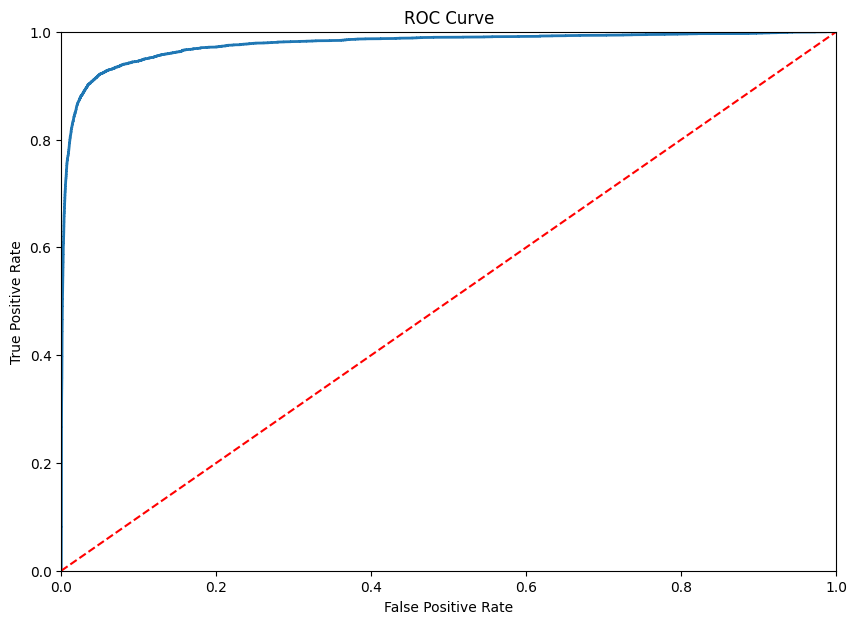

In [21]:
roc_plot(fpr, tpr)

## Calculate ROC-AUC, PR-AUC

In [22]:
roc_auc = roc_auc_score(y_train, y_scores)
pr_auc = average_precision_score(y_train, y_scores)

print(f"ROC-AUC is: {roc_auc}")
print(f"PR-AUC is :{pr_auc}")

ROC-AUC is: 0.976968100321557
PR-AUC is :0.8991044237199537
